<a href="https://colab.research.google.com/github/ashraf281/Machine-learning-project/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [4]:
#loading csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#print first five data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#number of rows and column
gold_data.shape

(2290, 6)

In [8]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

so we don't have any missing values in the data



Now getting some statistical measures of the data

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


finding correlation:
1. positive correlation
2. Negative correlation

In [12]:
correlation =gold_data.corr()

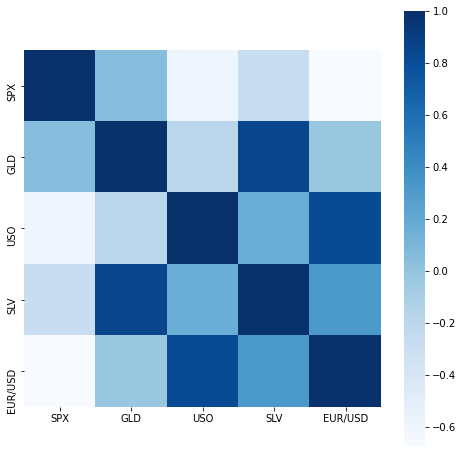

In [24]:
#constructing a heatmap to understand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot_kws={'size:8'},cmap='Blues')

In [25]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


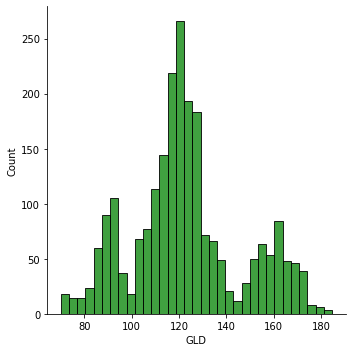

In [42]:
#Check the distribution of the GLD price
sns.displot(gold_data['GLD'], color='Green')

Splitting the features and Target

In [29]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spliting into trainnig data and Test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state =2)

Model Training: Random Forest Regression

In [33]:
regressor = RandomForestRegressor(n_estimators= 100)

In [34]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Model Evaluation

In [35]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[168.53839911  82.06699991 115.86780027 127.58320081 120.66120161
 154.70849761 150.20559874 126.32350036 117.5088986  126.09150092
 116.56810103 170.92450056 141.7921985  168.08369902 115.19410021
 117.88700041 138.13590288 170.37020177 159.46800231 160.85870019
 155.02080008 125.13220057 175.89420025 157.72110368 125.24480044
  93.69749991  77.39460013 120.73430007 119.08759913 167.48130015
  88.2629002  125.07760007  90.89670057 117.56410027 121.17679892
 136.25050152 115.49460156 115.27550071 147.33699948 107.08930094
 104.1194024   87.19739787 126.50020041 118.06159991 154.39929855
 119.55910021 108.28870014 108.28939813  93.12800044 126.96959873
  75.09340022 113.65329922 121.37779989 111.19859903 118.89169866
 120.53639923 159.4867997  169.15960112 146.99489731  86.02429894
  94.28390046  86.85179886  90.75129986 119.0530008  126.5154006
 127.61510026 168.14019994 122.28539926 117.52599892  98.36750019
 168.58420142 143.05139914 132.03990287 121.0865023  121.75739907
 119.638900

In [37]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error :", error_score)

R Squared error : 0.9901351737962828


Compare the actual value and predicted vlaues in a plot

In [38]:
Y_test= list(Y_test)

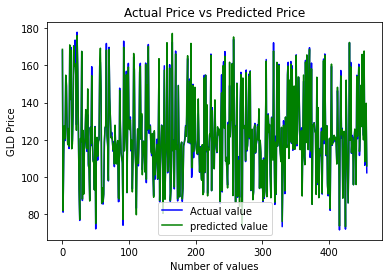

In [41]:
plt.plot(Y_test, color ='blue', label ='Actual value')
plt.plot(test_data_prediction, color= 'green', label= 'predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()